<a href="https://colab.research.google.com/github/nicolasbejar/tesis/blob/main/Analisis_de_velocidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Si no se tiene las librerias datetime y distfit se deben instalar
#!pip install distfit==1.4.0
import pandas as  pd
import numpy as np
import os 
from datetime import datetime, time
from distfit import distfit
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)


# 1. Data 

In [ ]:
#En esta parte se extraen los datos de velocidad para los primeros 3 meses de 2021,2 de 2020, ultimos 6 de 2019
data2 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Agosto_2019.csv")
data3 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Septiembre_2019.csv")
data4 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Octubre_2019.csv")
data5 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Noviembre_2019.csv")
data6 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Diciembre_2019.csv")
data7 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Enero_2020.csv")
data8 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Febrero_2020.csv")
data9 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Enero_2021.csv")
data10 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Febrero_2021.csv")
data11 = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Velocidades_Bitcarrier_Marzo_2021.csv")

# Tabla de RPM y la de los BINES
RPM = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/RPM_Index.csv", sep = ';')
Bines = pd.read_csv("C:/Users/nicol/OneDrive - Universidad de los Andes/UNIVERSIDAD/TESIS/Datos/Bines.csv", sep = ';')

#Se concatenan las tablas 
#data = [data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11]
data = [data2,data3,data4,data5,data6,data7,data8,data9,data10,data11]

data = pd.concat(data)
data

,OBJECTID,TID,INICIO,FIN,AÑO,HORA,DISTANCE,TYPE,VEL_PROMEDIO,CUARTO_HORA,DIA_SEMANA,MES,NAME_FROM,NAME_TO,CODIGO,COEF_BRT,COEF_MIXTO,VEL_MEDIA_BRT,VEL_MEDIA_MIXTO,VEL_MEDIA_PONDERADA,VEL_PONDERADA,SHAPELEN
0,1146799,1002041,2019/08/01 00:00:00+00,2019/08/01 00:15:00+00,2019,0,1411,1,64.547130,00:00:00,Jueves,August,CL26,AV.ROJAS;KR66A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1146800,1000087,2019/08/01 00:00:00+00,2019/08/01 00:15:00+00,2019,0,429,1,31.654979,00:00:00,Jueves,August,KR19,CL147;CL152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1146801,1002040,2019/08/01 00:00:00+00,2019/08/01 00:15:00+00,2019,0,1396,1,62.734439,00:00:00,Jueves,August,CL26,KR66A;AV.ROJAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1146802,1001036,2019/08/01 00:00:00+00,2019/08/01 00:15:00+00,2019,0,3241,1,49.095198,00:00:00,Jueves,August,CL13,KR68D;KR90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1146803,1002043,2019/08/01 00:00:00+00,2019/08/01 00:15:00+00,2019,0,999,1,65.654505,00:00:00,Jueves,August,CL26,NORMANDIA;AV.ROJAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388899,2392775,1002427,2021/03/31 22:00:00+00,2021/03/31 22:15:00+00,2021,22,580,1,23.823067,22:00:00,Miercoles,March,KR72,KR1;KR14F,KR72-KR1;KR14F,NaN,NaN,NaN,NaN,15.882045,15.882045,NaN
2388900,2392776,1002427,2021/03/31 22:15:00+00,2021/03/31 22:30:00+00,2021,22,580,1,20.733708,22:15:00,Miercoles,March,KR72,KR1;KR14F,KR72-KR1;KR14F,NaN,NaN,NaN,NaN,20.733708,20.733708,NaN
2388901,2392777,1002427,2021/03/31 23:15:00+00,2021/03/31 23:30:00+00,2021,23,580,1,26.807655,23:15:00,Miercoles,March,KR72,KR1;KR14F,KR72-KR1;KR14F,NaN,NaN,NaN,NaN,26.807655,26.807655,NaN
2388902,2392778,1002427,2021/03/31 23:30:00+00,2021/03/31 23:45:00+00,2021,23,580,1,21.842643,23:30:00,Miercoles,March,KR72,KR1;KR14F,KR72-KR1;KR14F,NaN,NaN,NaN,NaN,21.842643,21.842643,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21444177 entries, 0 to 2388903
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   OBJECTID             int64  
 1   TID                  int64  
 2   INICIO               object 
 3   FIN                  object 
 4   AÑO                  int64  
 5   HORA                 int64  
 6   DISTANCE             int64  
 7   TYPE                 int64  
 8   VEL_PROMEDIO         float64
 9   CUARTO_HORA          object 
 10  DIA_SEMANA           object 
 11  MES                  object 
 12  NAME_FROM            object 
 13  NAME_TO              object 
 14  CODIGO               object 
 15  COEF_BRT             float64
 16  COEF_MIXTO           float64
 17  VEL_MEDIA_BRT        float64
 18  VEL_MEDIA_MIXTO      float64
 19  VEL_MEDIA_PONDERADA  float64
 20  VEL_PONDERADA        float64
 21  SHAPELEN             float64
dtypes: float64(8), int64(6), object(8)
memory usage: 3.7+ GB


# 2. Limpieza datos

In [ ]:
#Creo un nuevo df con la info que me interesa
df = data[["DIA_SEMANA","CUARTO_HORA","NAME_FROM","NAME_TO","VEL_PROMEDIO"]]

#Separo la info del origen destino en dos columnas FROM y TO
df["FROM"] = df["NAME_TO"].str.split(";").str.get(0)
df["TO"] = df["NAME_TO"].str.split(";").str.get(1)

#Selecciono unicamente los dias de la semana que me interesan y el origen desde el cual
#voy a trabajar que es sobre la autopista norte
df = df[(df["DIA_SEMANA"] != "Sabado") & (df["DIA_SEMANA"] != "Domingo")]
df = df[(df["NAME_FROM"] == "AUTONORTE")]

#Selecciono las horas que me interesan (3pm - 9pm) 
df["CUARTO_HORA"] =  pd.to_datetime(df["CUARTO_HORA"]).dt.time
df = df[(df["CUARTO_HORA"] >= time(hour=15)) & (df["CUARTO_HORA"] <= time(hour=21) )]

#Conversion de velocidad de Km/h a m/s
df["VEL_PROMEDIO"] = df["VEL_PROMEDIO"]/3.6

#Ordeno los datos y selecciono las nuevas columnas de interes
df = df.sort_values(["DIA_SEMANA","FROM", "TO", "CUARTO_HORA"])
df = df[["DIA_SEMANA","CUARTO_HORA","FROM","TO","VEL_PROMEDIO"]]

df

,DIA_SEMANA,CUARTO_HORA,FROM,TO,VEL_PROMEDIO
42815,Jueves,15:00:00,ALCALA,CL146,8.040145
529309,Jueves,15:00:00,ALCALA,CL146,11.589666
1013603,Jueves,15:00:00,ALCALA,CL146,10.758675
1503207,Jueves,15:00:00,ALCALA,CL146,7.335270
1951485,Jueves,15:00:00,ALCALA,CL146,6.377322
...,...,...,...,...,...
1531646,Viernes,21:00:00,VIRREY,CL82,12.502416
2072902,Viernes,21:00:00,VIRREY,CL82,12.417362
1127857,Viernes,21:00:00,VIRREY,CL82,11.207344
1666955,Viernes,21:00:00,VIRREY,CL82,10.902908


In [ ]:
# Registros únicos de los viajes
df[["FROM","TO"]].drop_duplicates()


,FROM,TO
42815,ALCALA,CL146
42496,ALCALA,PRADO
42907,CARDIO.INFANTIL,CL146
42909,CARDIO.INFANTIL,TOBERIN
43063,CL100,PEPE.SIERRA
43103,CL100,VIRREY
42490,CL127,PEPE.SIERRA
42482,CL127,PRADO
42817,CL146,ALCALA
42911,CL146,CARDIO.INFANTIL


## a) Asignación de Nodos

In [ ]:
#Muestro los destinos unicos de las columnas FROM y TO
conditions = [
    ((df["FROM"] == "CL80")),
    ((df["FROM"] == "CL82")),
    ((df["FROM"] == "VIRREY")),
    ((df["FROM"] == "CL100")),
    ((df["FROM"] == "PEPE.SIERRA")),
    ((df["FROM"] == "CL127")),
    ((df["FROM"] == "PRADO")),
    ((df["FROM"] == "ALCALA")),
    ((df["FROM"] == "CL146")),
    ((df["FROM"] == "CARDIO.INFANTIL")),
    ((df["FROM"] == "TOBERIN")),
    ((df["FROM"] == "SANTA.FE"))
    ]

values = [80,80,100,100,116,127,127,134,134,153,170,183]
df['NODO_O'] = np.select(conditions, values)

conditions = [
    ((df["FROM"] == "CL80") & (df["TO"] == "CL82")),
    ((df["FROM"] == "CL82") & (df["TO"] == "VIRREY")),
    ((df["FROM"] == "VIRREY") & (df["TO"] == "CL100")),
    ((df["FROM"] == "CL100") & (df["TO"] == "PEPE.SIERRA")),
    ((df["FROM"] == "PEPE.SIERRA") & (df["TO"] == "CL127")),
    ((df["FROM"] == "CL127") & (df["TO"] == "PRADO")),
    ((df["FROM"] == "PRADO") & (df["TO"] == "ALCALA")),
    ((df["FROM"] == "ALCALA") & (df["TO"] == "CL146")),
    ((df["FROM"] == "CL146") & (df["TO"] == "CARDIO.INFANTIL")),
    ((df["FROM"] == "CARDIO.INFANTIL") & (df["TO"] == "TOBERIN")),
    ((df["FROM"] == "TOBERIN") & (df["TO"] == "SANTA.FE"))
    ]

values = [100,100,116,116,127,134,134,153,153,170,183]
df['NODO_D'] = np.select(conditions, values)
df = df[(df["NODO_O"] != 0) & (df["NODO_D"] != 0) ]
df = df[["DIA_SEMANA","CUARTO_HORA","NODO_O","NODO_D","VEL_PROMEDIO"]]

#Hago una copia para utilzar estos datos limpios más adelante
dfX = df

df

,DIA_SEMANA,CUARTO_HORA,NODO_O,NODO_D,VEL_PROMEDIO
42815,Jueves,15:00:00,134,153,8.040145
529309,Jueves,15:00:00,134,153,11.589666
1013603,Jueves,15:00:00,134,153,10.758675
1503207,Jueves,15:00:00,134,153,7.335270
1951485,Jueves,15:00:00,134,153,6.377322
...,...,...,...,...,...
2073136,Viernes,21:00:00,100,116,12.711353
514876,Viernes,21:00:00,100,116,12.756354
1128146,Viernes,21:00:00,100,116,12.597264
1667319,Viernes,21:00:00,100,116,12.469666


## b) Velocidad promedio y desviación estándar

In [ ]:
#Saco la velocidad promedio para cada una de las franjas de 15 min para cada par de nodos
df1 = df[["DIA_SEMANA","CUARTO_HORA","NODO_O","NODO_D","VEL_PROMEDIO"]]
df1 = df1.sort_values(["DIA_SEMANA","CUARTO_HORA","NODO_O", "NODO_D"])
df1 = df1.groupby(["DIA_SEMANA","NODO_O","NODO_D","CUARTO_HORA"]).mean()
df1 = df1.reset_index()

conditions = [
    (df1.index % 23 == 1),
    (df1.index % 23 != 1)
    ]

values = [0, (df1["VEL_PROMEDIO"].shift(-1)-df1["VEL_PROMEDIO"])/900]
df1['ACCELERATION'] = np.select(conditions, values)

#Saco la desv. standard para cada una de las franjas de 15 min para cada par de nodos

df2 = df[["DIA_SEMANA","CUARTO_HORA","NODO_O","NODO_D","VEL_PROMEDIO"]]
df2 = df2.sort_values(["DIA_SEMANA","CUARTO_HORA","NODO_O", "NODO_D"])
df2 = df2.groupby(["DIA_SEMANA","NODO_O","NODO_D","CUARTO_HORA"]).std()
df2 = df2.reset_index()
df2 = df2.rename(columns={'VEL_PROMEDIO': 'VEL_PROMEDIO_SD'})


#Se combinan los dos df resultantes
df1 = df1.merge(df2, how='left', on=["DIA_SEMANA","NODO_O","NODO_D","CUARTO_HORA"])
df = df1[['DIA_SEMANA', 'NODO_O', 'NODO_D', 'CUARTO_HORA',"VEL_PROMEDIO","VEL_PROMEDIO_SD","ACCELERATION"]]
df = df.fillna(0)

df

,DIA_SEMANA,NODO_O,NODO_D,CUARTO_HORA,VEL_PROMEDIO,VEL_PROMEDIO_SD,ACCELERATION
0,Jueves,80,100,15:00:00,7.525472,3.146894,0.000082
1,Jueves,80,100,15:15:00,7.599399,3.020614,0.000000
2,Jueves,80,100,15:30:00,7.588128,2.899043,-0.000047
3,Jueves,80,100,15:45:00,7.546225,2.918090,-0.000034
4,Jueves,80,100,16:00:00,7.516014,2.905947,0.000008
...,...,...,...,...,...,...,...
870,Viernes,170,183,20:00:00,11.134154,3.678230,0.000176
871,Viernes,170,183,20:15:00,11.292809,3.669631,0.000391
872,Viernes,170,183,20:30:00,11.644928,3.636204,0.000485
873,Viernes,170,183,20:45:00,12.081072,3.492843,0.000282


In [ ]:
#VSP
df["VSP"] = df["VEL_PROMEDIO"]*1.1*df["ACCELERATION"] + 0.132*df["VEL_PROMEDIO"] + (0.000302*df["VEL_PROMEDIO"]**3)

#RPM Index
conditions = [
    (df["VSP"] < 16),
    (df["VSP"] >= 16)
    ]

values = [RPM.iloc[round(df["VEL_PROMEDIO"])]["VSP_MEN_16"], RPM.iloc[round(df["VEL_PROMEDIO"])]["VSP_MAY_16"]]
df["RPM_INDEX"] = np.select(conditions, values)

#Estres de Motor
df["ESTRES_MOTOR"] = df["RPM_INDEX"] + 0.08*df["VSP"]
df


,DIA_SEMANA,NODO_O,NODO_D,CUARTO_HORA,VEL_PROMEDIO,VEL_PROMEDIO_SD,ACCELERATION,VSP,RPM_INDEX,ESTRES_MOTOR
0,Jueves,80,100,15:00:00,7.525472,3.146894,0.000082,1.122751,1.600,1.689820
1,Jueves,80,100,15:15:00,7.599399,3.020614,0.000000,1.135660,1.600,1.690853
2,Jueves,80,100,15:30:00,7.588128,2.899043,-0.000047,1.133195,1.600,1.690656
3,Jueves,80,100,15:45:00,7.546225,2.918090,-0.000034,1.125600,1.600,1.690048
4,Jueves,80,100,16:00:00,7.516014,2.905947,0.000008,1.120400,1.600,1.689632
...,...,...,...,...,...,...,...,...,...,...
870,Viernes,170,183,20:00:00,11.134154,3.678230,0.000176,1.888716,1.571,1.722097
871,Viernes,170,183,20:15:00,11.292809,3.669631,0.000391,1.930434,1.571,1.725435
872,Viernes,170,183,20:30:00,11.644928,3.636204,0.000485,2.020227,1.714,1.875618
873,Viernes,170,183,20:45:00,12.081072,3.492843,0.000282,2.130957,1.714,1.884477


# 3. Funciones

In [ ]:
def definirBIN():
    bines = []
    eng = "bajo"
    for index,row in df.iterrows():
        estr = row['ESTRES_MOTOR'] 
        if ((estr >= 3.1) & (estr < 7.8)):
            eng = "medio"
        elif ((estr >= 7.8) & (estr < 12.6)):
            eng = "alto"
        vsp = round(row["VSP"], 1)
        binX = Bines.loc[((Bines["VSP_MEN"] <= round(row["VSP"], 1)) & (Bines["VSP_MAY"]>vsp)), [eng]]
        bines.append(binX[eng].iloc[0])
    df["BIN"] = bines

definirBIN()
df

,DIA_SEMANA,NODO_O,NODO_D,CUARTO_HORA,VEL_PROMEDIO,VEL_PROMEDIO_SD,ACCELERATION,VSP,RPM_INDEX,ESTRES_MOTOR,BIN
0,Jueves,80,100,15:00:00,7.525472,3.146894,0.000082,1.122751,1.600,1.689820,11
1,Jueves,80,100,15:15:00,7.599399,3.020614,0.000000,1.135660,1.600,1.690853,11
2,Jueves,80,100,15:30:00,7.588128,2.899043,-0.000047,1.133195,1.600,1.690656,11
3,Jueves,80,100,15:45:00,7.546225,2.918090,-0.000034,1.125600,1.600,1.690048,11
4,Jueves,80,100,16:00:00,7.516014,2.905947,0.000008,1.120400,1.600,1.689632,11
...,...,...,...,...,...,...,...,...,...,...,...
870,Viernes,170,183,20:00:00,11.134154,3.678230,0.000176,1.888716,1.571,1.722097,12
871,Viernes,170,183,20:15:00,11.292809,3.669631,0.000391,1.930434,1.571,1.725435,12
872,Viernes,170,183,20:30:00,11.644928,3.636204,0.000485,2.020227,1.714,1.875618,12
873,Viernes,170,183,20:45:00,12.081072,3.492843,0.000282,2.130957,1.714,1.884477,12


In [ ]:
len(df[(df['ESTRES_MOTOR']>= 3.1)])

0

<AxesSubplot:ylabel='Density'>

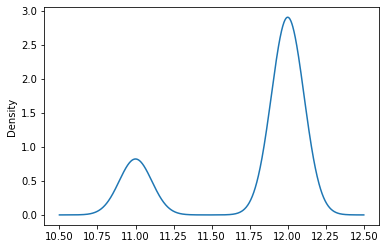

In [ ]:
df["BIN"].plot.kde()

In [ ]:
dfX.iloc[1:44]

,DIA_SEMANA,CUARTO_HORA,NODO_O,NODO_D,VEL_PROMEDIO
529309,Jueves,15:00:00,134,153,11.589666
1013603,Jueves,15:00:00,134,153,10.758675
1503207,Jueves,15:00:00,134,153,7.335270
1951485,Jueves,15:00:00,134,153,6.377322
449575,Jueves,15:00:00,134,153,11.057150
1040849,Jueves,15:00:00,134,153,12.294291
1314045,Jueves,15:00:00,134,153,8.694338
1783584,Jueves,15:00:00,134,153,13.121702
142446,Jueves,15:00:00,134,153,11.217746
625064,Jueves,15:00:00,134,153,11.545129


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 1.2533067] [loc=9.663 scale=2.358]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.3600685] [loc=5.567 scale=4.096]
[distfit] >[pareto    ] [0.03 sec] [RSS: 1.5074709] [loc=-0.015 scale=5.582]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 1.1538668] [loc=9.855 scale=2.337]
[distfit] >[t         ] [0.05 sec] [RSS: 1.2532870] [loc=9.663 scale=2.358]
[distfit] >[genextreme] [0.02 sec] [RSS: 1.2126269] [loc=9.188 scale=2.644]
[distfit] >[gamma     ] [0.05 sec] [RSS: 1.2556733] [loc=-38.728 scale=0.117]
[distfit] >[lognorm   ] [0.09 sec] [RSS: 1.2538449] [loc=-326.739 scale=336.394]
[distfit] >[beta      ] [0.06 sec] [RSS: 1.0769493] [loc=5.498 scale=7.719]
[distfit] >[uniform   ] [0.00 sec] [RSS: 1.1097011] [loc=5.567 scale=7.649]
[distfit] >[loggamma  ] [0.02 sec] [RSS: 1.2429978] [loc=0.272 scale=5.550]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


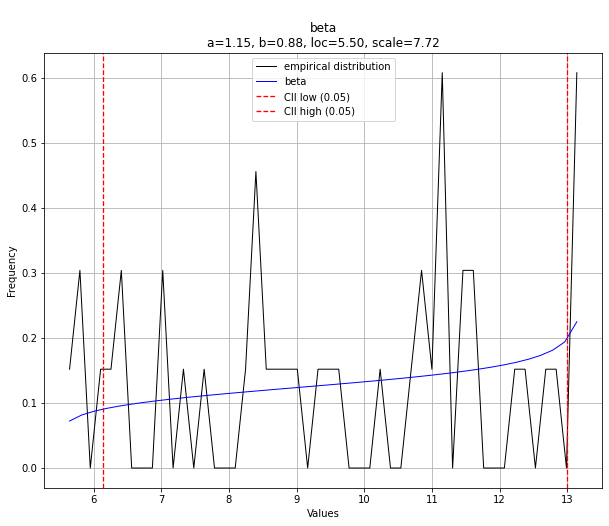

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\na=1.15, b=0.88, loc=5.50, scale=7.72'}, xlabel='Values', ylabel='Frequency'>)

In [ ]:
dist = distfit(todf=True)
dist.fit_transform(dfX.iloc[1:44]["VEL_PROMEDIO"])
dist.plot()